# **AIPI 590 - XAI | Assignment #1**
### Interpretable ML Assignment
### Lindsay Gross


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/18r50P2SgkHUKty02ZOacZssCm6J902fk)


👉 Make sure to delete the helper markdown below in your own notebook!

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

## **IF YOU PLAN ON RUNNING IN COLAB, RUN THIS TO GET THE DATA SET**

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import os

# check if running in google colab
try:
    import google.colab
    IN_COLAB = True
    from google.colab import drive
except ImportError:
    IN_COLAB = False

repo_name = "Interpretable-ML"
git_path = "https://github.com/lindsaygross/Interpretable-ML.git"

if IN_COLAB:
    print("running in google colab...")

    # mount google drive
    drive.mount('/content/drive')

    # navigate to drive location
    drive_path = '/content/drive/MyDrive/Duke ME AIPI'
    os.makedirs(drive_path, exist_ok=True)
    %cd "{drive_path}"

    # clone or update repo
    if not os.path.exists(repo_name):
        !git clone {git_path}
    else:
        %cd {repo_name}
        !git pull origin main
        %cd ..

    %cd {repo_name}

    # install dependencies
    if os.path.exists("requirements.txt"):
        !pip install -r requirements.txt
    else:
        !pip install pandas numpy matplotlib seaborn scikit-learn

    # verify csv file exists
    csv_file = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
    if os.path.exists(csv_file):
        print(f"csv file found: {csv_file}")
    else:
        print("csv file not found")

else:
    # local setup
    if os.path.exists("requirements.txt"):
        !pip install -r requirements.txt
    else:
        print("requirements.txt not found")

running in google colab...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Duke ME AIPI
/content/drive/MyDrive/Duke ME AIPI/Interpretable-ML
From https://github.com/lindsaygross/Interpretable-ML
 * branch            main       -> FETCH_HEAD
Already up to date.
/content/drive/MyDrive/Duke ME AIPI
/content/drive/MyDrive/Duke ME AIPI/Interpretable-ML
  Using cached pandas-2.1.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached matplotlib-3.8.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached scikit_learn-1.4.1.post1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
ERROR: Ignored the following versions that require a different python version: 0.8.1 Requires-Python >=3.8.1,<3.1

## **Dependencies**

In [53]:
import numpy as np
import pandas as pd


# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

## **Exploratory Data Analysis**
Check assumptions

## **Column Explanations**
customerID:
<br>
gender:
<br>
SeniorCitizen:
<br>
Partner:
<br>
Dependents: 
<br>
tenure:
<br>
PhoneService:
<br>
MultipleLines:
<br>
InternetService: 
<br>
OnlineSecurity: 
<br>
OnlineBackup: 
<br>
DeviceProtection: 
<br>
TechSupport:
<br>
StreamingTV:
<br>
StreamingMovies:
<br>
Contract:
<br>
PaperlessBilling:
<br>
PaymentMethod:
<br>
MonthlyCharges:
<br>
TotalCharges:
<br>
Churn:
<br>


loaded from local directory
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilli

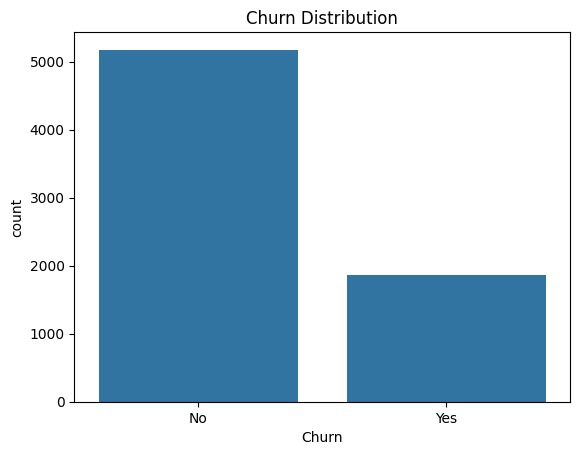

In [54]:
"""
Perform an exploratory analysis of the dataset to understand the relationships between different
features and the target variable (churn). Use appropriate visualizations and statistical methods
to determine whether assumptions about linear, logistic, and GAM models are met.
"""

#df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("loaded from local directory")
except:
    try:
        df = pd.read_csv('/content/drive/MyDrive/Duke ME AIPI/Interpretable-ML/WA_Fn-UseC_-Telco-Customer-Churn.csv')
        print("loaded from colab repo")
    except:
        df = pd.read_csv('/content/drive/MyDrive/Explainable AI/WA_Fn-UseC_-Telco-Customer-Churn.csv')
        print("loaded from colab drive")

df.head()

# describe the data
print(df.info())
print(df.shape)
print(df.describe())

# visualize the churn distribution
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Summary of above EDA**
---
<br>
- The above eda display a simple analysis of the dataframe calling the info function.

# Assumptions Explained

In [ ]:
# Check for assumptions of linearity

In [ ]:
# Check for assumptions of Independence of Observations

In [ ]:
# Check for assumptions of Homoscedasticity

In [ ]:
# Check for assumptions of Normality of Residuals

In [ ]:
# Check for assumptions of No Multicollinearity

In [ ]:
# Check for assumptions of No Influential Outliers

In [ ]:
# Coefficent Comparison Plot

In [ ]:
# Residual Plot

In [ ]:
# Actual vs Predicted Plot

In [ ]:
# Feature Importance Plot

In [ ]:
# Lasso Regualrization Plot

In [ ]:
# Linear Regression Model

In [ ]:
# Logistic Regression Model

In [ ]:
# GAM Model

# Discussion of Strengths and Weaknesses

# Recommendation of telecommunications model
Recommendations for which model(s) the telecommunications company should use to address their customer churn problem are provided and explained in markdown